### Edgar Moises Hernandez-Gonzalez
#### 19/11/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN-1D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 66, 1))
x_test = x_test.reshape((n_samples_test, 66, 1))

print(x_train.shape)
print(x_test.shape)

(288, 66, 1)
(288, 66, 1)


In [9]:
model = Sequential()
model.add(Conv1D(16,3, activation='relu', input_shape=(66,1)))
#model.add(MaxPool1D(2))
#model.add(Conv1D(32,3, activation='relu'))
#model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 64, 16)            64        
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 131,780
Trainable params: 131,780
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 2s 6ms/sample - loss: 1.4890 - acc: 0.2778 - val_loss: 1.4669 - val_acc: 0.3333
Epoch 2/20
288/288 [==============================] - 0s 389us/sample - loss: 1.3247 - acc: 0.3889 - val_loss: 1.2255 - val_acc: 0.4375
Epoch 3/20
288/288 [==============================] - 0s 367us/sample - loss: 1.2292 - acc: 0.4306 - val_loss: 1.3095 - val_acc: 0.3924
Epoch 4/20
288/288 [==============================] - 0s 364us/sample - loss: 1.1904 - acc: 0.4757 - val_loss: 1.2236 - val_acc: 0.4549
Epoch 5/20
288/288 [==============================] - 0s 377us/sample - loss: 1.1668 - acc: 0.4688 - val_loss: 1.2365 - val_acc: 0.4236
Epoch 6/20
288/288 [==============================] - 0s 322us/sample - loss: 1.1181 - acc: 0.4965 - val_loss: 1.1206 - val_acc: 0.4826
Epoch 7/20
288/288 [==============================] - 0s 336us/sample - loss: 1.0662 - acc: 0.5000 - val_loss: 1.1168 - val_acc: 0.4583
Epoc

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 94us/sample - loss: 1.1034 - acc: 0.4965
Test loss: 1.103422741095225
Test accuracy: 0.4965278


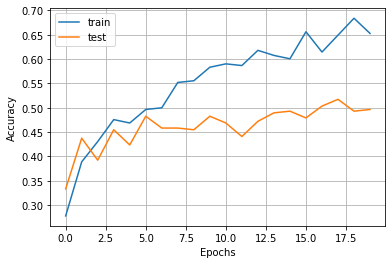

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

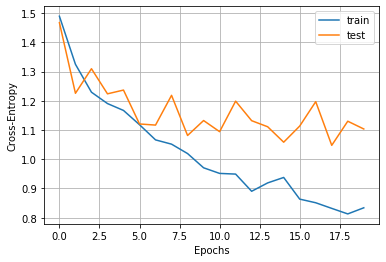

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.3287037037037037


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[32 29  6  5]
 [15 51  5  1]
 [16  4 30 22]
 [14  2 26 30]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        72
           1       0.59      0.71      0.65        72
           2       0.45      0.42      0.43        72
           3       0.52      0.42      0.46        72

   micro avg       0.50      0.50      0.50       288
   macro avg       0.49      0.50      0.49       288
weighted avg       0.49      0.50      0.49       288

